# Vector Analysis

In [1]:
import geopandas

## Reading in a shapefile

In [2]:
# File path
cities = geopandas.read_file('/vsicurl/https://github.com/mhweber/Rspatialworkshop/raw/master/inst/extdata/cities.shp')
# Check input data
cities.head()

,AREA,PERIMETER,CITIES_,CITIES_ID,CITY,FLAG,geometry
0,0.0,0.0,1,1658,MULINO,0,POINT (776899.812 1272019.125)
1,0.0,0.0,2,1368,HAMMOND,0,POINT (439320.844 1638725.000)
2,0.0,0.0,3,1366,FORT STEVENS,0,POINT (435108.000 1641590.750)
3,0.0,0.0,4,1382,GLIFTON,0,POINT (560721.000 1638699.875)
4,0.0,0.0,5,1384,BRADWOOD,0,POINT (568325.812 1632800.000)


In [3]:
# object type is GeoDataFrame
type(cities)

geopandas.geodataframe.GeoDataFrame

## geopandas.GeoDataFrame is a subclass of pandas.Dataframe - all the pandas functinoality is available to use on it

In [4]:
type(cities['CITY'])

pandas.core.series.Series

In [5]:
cities['CITY'].str.lower()

0                 mulino
1                hammond
2           fort stevens
3                glifton
4               bradwood
             ...        
893            cornelius
894               harbor
895            marshland
896          lake oswego
897    twelvemile corner
Name: CITY, Length: 898, dtype: object

## Plus it has a special geometry column

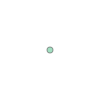

In [6]:
# Plus geometry column
cities.iloc[0]['geometry']

In [7]:
# Each value is a geometry object
type(cities.iloc[0]['geometry'])

shapely.geometry.point.Point

In [8]:
# With spatial attributes like x & y
cities.iloc[0]['geometry'].x, cities.iloc[0]['geometry'].y

(776899.8125, 1272019.125)

In [9]:
# Shapely geometry object has various spatial attributes/methods
dir(cities.iloc[0]['geometry'])

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_interpolate

## GeoDataFrame spatial methods

In [10]:
# Distance to point
cities['distance_mulino'] = cities.distance(cities.iloc[0]['geometry'])
cities['distance_mulino']

0      0.000000e+00
1      4.984303e+05
2      5.033933e+05
3      4.256619e+05
4      4.167325e+05
           ...     
893    1.607713e+05
894    1.239386e+06
895    3.710563e+05
896    7.702938e+04
897    1.108091e+05
Name: distance_mulino, Length: 898, dtype: float64

In [11]:
# Buffer
gdf_buff = cities.buffer(10)
gdf_buff

0      POLYGON ((776909.812 1272019.125, 776909.764 1...
1      POLYGON ((439330.844 1638725.000, 439330.796 1...
2      POLYGON ((435118.000 1641590.750, 435117.952 1...
3      POLYGON ((560731.000 1638699.875, 560730.952 1...
4      POLYGON ((568335.812 1632800.000, 568335.764 1...
                             ...                        
893    POLYGON ((656732.688 1378812.750, 656732.639 1...
894    POLYGON ((289959.125 132301.000, 289959.077 13...
895    POLYGON ((605166.125 1600936.875, 605166.077 1...
896    POLYGON ((756651.562 1346336.875, 756651.514 1...
897    POLYGON ((816572.000 1375486.875, 816571.952 1...
Length: 898, dtype: geometry

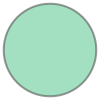

In [12]:
gdf_buff[0]

## Writing results to a shapefile

In [14]:
gdf_buff.to_file(r'C:\Users\jbousqui\Local_GIS\temp_test\OS_gdf_example.shp')